In [1]:
# 1. Color Selector
# 2. Tolerance to expand the green region (more or few colors as green)
# 3. Edge Smoothing
# 4. Green Cast Removal Slider

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def save_video(cap, video_local_path):
    
    codec = cv2.VideoWriter_fourcc('M','J','P','G')
    width, height = int(cap.get(3)), int(cap.get(4))
    fps = cap.get(cv2.CAP_PROP_FPS)
    out = cv2.VideoWriter(video_local_path, codec, fps, (width, height))
    
    return out

(720, 1280, 3)
(533, 800, 3)
(720, 1280, 3)


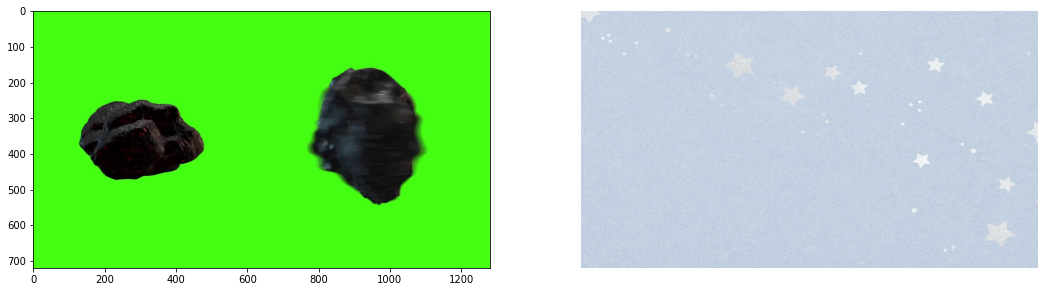

In [4]:
gs = cv2.imread('./data/frame_1.jpeg', cv2.IMREAD_COLOR)
print(gs.shape)

background = cv2.imread('./data/sky.jpg', cv2.IMREAD_COLOR)
print(background.shape)

background_scaled = cv2.resize(background, (gs.shape[1], gs.shape[0]))
print(background_scaled.shape)

cv2.imwrite('./data/background.jpg', background_scaled)

plt.figure(figsize=(18, 10))
plt.subplot(1,2,1)
plt.imshow(gs[:,:,::-1])
# plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(background_scaled[:,:,::-1])
plt.axis('off')

plt.show()

In [5]:
print(gs[0,0,:])
print(gs[100,100,:])
print(gs[200,200,:])
print(gs[400,600,:])
print(gs[600,800,:])

[ 18 255  68]
[ 18 255  68]
[ 18 255  68]
[ 18 255  68]
[ 18 255  68]


In [6]:
gs_hsv = cv2.cvtColor(gs, cv2.COLOR_BGR2HSV)

print(gs_hsv[0,0,:])
print(gs_hsv[100,100,:])
print(gs_hsv[200,200,:])
print(gs_hsv[400,600,:])
print(gs_hsv[600,800,:])

[ 54 237 255]
[ 54 237 255]
[ 54 237 255]
[ 54 237 255]
[ 54 237 255]


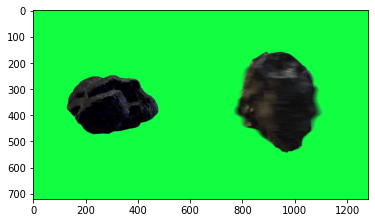

In [7]:
imrgb = cv2.cvtColor(gs_hsv, cv2.COLOR_HSV2RGB)
plt.imshow(imrgb[:,:,::-1])
plt.show()

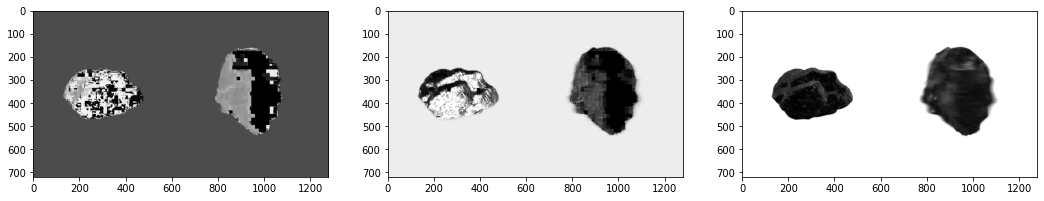

In [8]:
plt.figure(figsize=(18, 10))

plt.subplot(1,3,1)
plt.imshow(gs_hsv[:,:,0], cmap='gray', vmin=0, vmax=180)

plt.subplot(1,3,2)
plt.imshow(gs_hsv[:,:,1], cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,3)
plt.imshow(gs_hsv[:,:,2], cmap='gray', vmin=0, vmax=255)

plt.show()

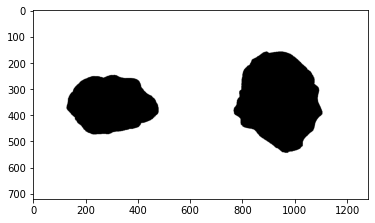

[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255]


In [119]:
# 54, 237, 255

mask = cv2.inRange(gs_hsv, np.array([50, 200, 240]), np.array([58, 255, 255]))
plt.imshow(mask, cmap='gray')
plt.show()
print(mask[300][135:155])

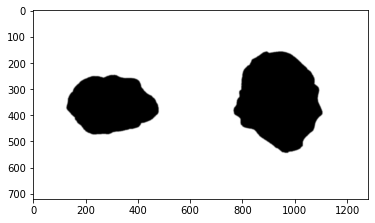

[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 254 248
 229 190]


In [121]:
mask_blur = cv2.GaussianBlur(mask, (7, 7), 0, 0)
# cv2.normalize(mask_blur, dst = mask_blur, alpha = 0, beta = 1, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
plt.imshow(mask_blur, cmap='gray')
plt.show()
print(mask_blur[300][135:155])

In [123]:
print(mask[0][0])
print(mask[300][200])

255
0


In [124]:
print(mask_blur[0][0])
print(mask_blur[300][200])
print(mask_blur[300][135:155])

255
0
[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 254 248
 229 190]


In [125]:
mask3d = np.uint8(mask/255)
mask3d = cv2.merge((mask3d, mask3d, mask3d))
print(mask3d[300][135:155])

[[1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]]


In [126]:
mask3d = (mask_blur/255)
mask3d = cv2.merge((mask3d, mask3d, mask3d))
print(mask3d[300][135:155])

[[1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [0.99607843 0.99607843 0.99607843]
 [0.97254902 0.97254902 0.97254902]
 [0.89803922 0.89803922 0.89803922]
 [0.74509804 0.74509804 0.74509804]]


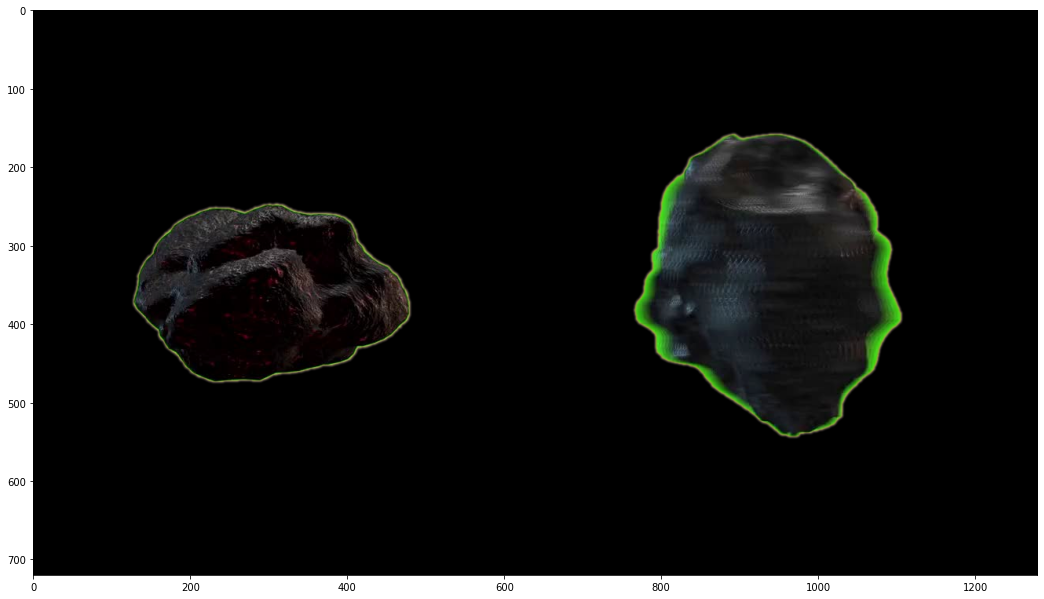

In [129]:
plt.figure(figsize=(18, 30))

objects = cv2.multiply(np.array(gs_hsv, dtype=float), np.array(1-mask3d, dtype=float))
masked_region = cv2.cvtColor(np.uint8(objects), cv2.COLOR_HSV2BGR)

plt.imshow(masked_region[:,:,::-1])
plt.show()

# objects = cv2.multiply(gs_hsv, 1-mask3d)
# masked_region = cv2.cvtColor(objects, cv2.COLOR_HSV2BGR)

# plt.imshow(masked_region[:,:,::-1])
# plt.show()

In [64]:
masked_region[300][145:165]

array([[  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  6,   6,   7],
       [ 21,  22,  24],
       [ 48,  55,  63],
       [ 72, 111, 117],
       [ 68, 145, 119],
       [ 15,  94,  41],
       [ 22,  71,  32],
       [ 39,  61,  46],
       [ 43,  50,  48],
       [ 42,  43,  47],
       [ 37,  39,  39],
       [ 37,  38,  33],
       [ 42,  38,  34]], dtype=uint8)

In [57]:
cv2.cvtColor(np.uint8(masked_region), cv2.COLOR_BGR2HSV)[300][135:165]

array([[  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,  36,   7],
       [ 10,  32,  24],
       [ 14,  61,  63],
       [ 26,  98, 117],
       [ 40, 135, 145],
       [ 50, 214,  94],
       [ 54, 176,  71],
       [ 50,  92,  61],
       [ 39,  36,  50],
       [  6,  27,  47],
       [ 30,  13,  39],
       [ 84,  34,  38],
       [105,  49,  42]], dtype=uint8)

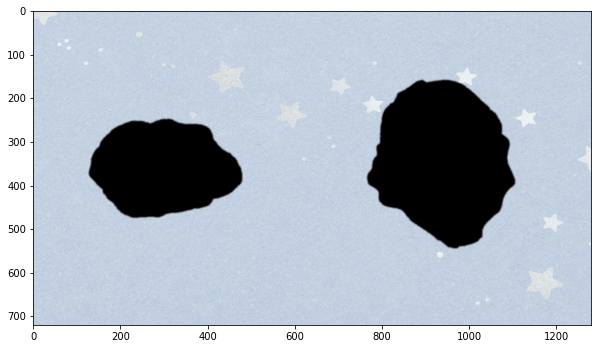

In [130]:
plt.figure(figsize=(10, 18))

background_masked = np.uint8(cv2.multiply(np.array(background_scaled, dtype=float), np.array(mask3d, dtype=float)))
plt.imshow(background_masked[:,:,::-1])
plt.show()

# background_masked = cv2.multiply(background_scaled, mask3d)
# plt.imshow(background_masked[:,:,::-1])
# plt.show()

In [131]:
# plt.figure(figsize=(10, 18))

# foreground_masked = 255 - mask
# foreground_masked_blur = cv2.GaussianBlur(foreground_masked, (7, 7), 0, 0)

# mask3d = (foreground_masked_blur/255)
# mask3d = cv2.merge((mask3d, mask3d, mask3d))


# # plt.figure(figsize=(10, 18))

# foreground_masked = np.uint8(cv2.multiply(np.array(imrgb, dtype=float), np.array(mask3d, dtype=float)))

# # foreground_masked = np.uint8(cv2.multiply(np.array(background_scaled, dtype=float), np.array(mask3d, dtype=float)))
# # plt.imshow(background_masked[:,:,::-1])
# # plt.show()

# # # background_masked = cv2.multiply(background_scaled, mask3d)
# # # plt.imshow(background_masked[:,:,::-1])

# plt.imshow(foreground_masked)

# plt.show()

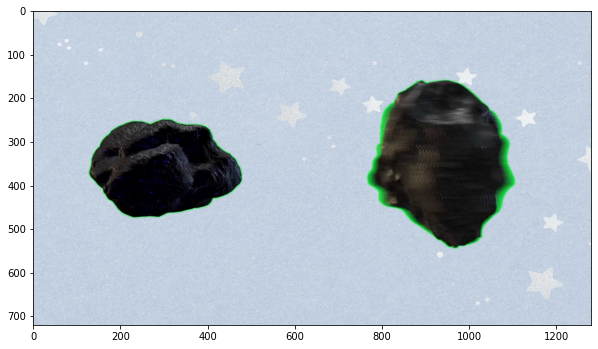

In [132]:
plt.figure(figsize=(10, 18))

removed_green_screen = cv2.add(background_masked, foreground_masked)
plt.imshow(removed_green_screen[:,:,::-1])
plt.show()

In [133]:
def process(image, background, m=np.array([54, 237, 255]), dev=np.array([2, 10, 30])):
    
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    
    lower_bound = np.array([ m[0]-m[0]*dev[0]/100, m[1]-m[1]*dev[1]/100, m[2]-m[2]*dev[2]/100 ])
    upper_bound = np.array([ m[0]+m[0]*dev[0]/100, m[1]+m[1]*dev[1]/100, m[2]+m[2]*dev[2]/100 ])
    
    # print(lower_bound, upper_bound)
    
    mask = cv2.inRange(image_hsv, lower_bound, upper_bound)    
    
    mask1d = np.uint8(mask/255)
    mask3d = cv2.merge((mask1d, mask1d, mask1d))
    
    visible_objects_hsv = cv2.multiply(image_hsv, 1-mask3d)
    visible_objects_bgr = cv2.cvtColor(visible_objects_hsv, cv2.COLOR_HSV2BGR)
    
    background_masked = cv2.multiply(background, mask3d)
    
    removed_green_screen = cv2.add(background_masked, visible_objects_bgr)
    
    return removed_green_screen

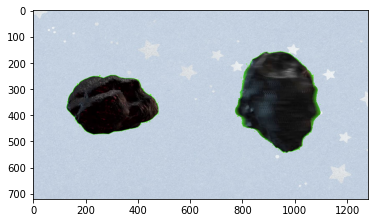

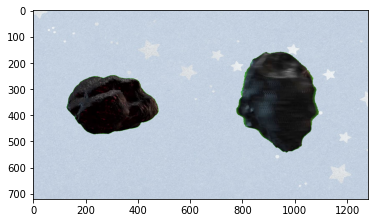

In [134]:
plt.imshow(process(gs, background_scaled)[:,:,::-1])
plt.show()

plt.imshow(process(gs, background_scaled, np.array([54, 237, 255]), np.array([5, 25, 50]))[:,:,::-1])
plt.show()

In [83]:
th, alpha = cv2.threshold(np.array(rgb),0,255, cv2.THRESH_BINARY)

NameError: name 'rgb' is not defined

In [18]:
def process_patches(image, background, dev, patches):
    
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    if len(patches) == 0:
        lower_hue, upper_hue = (54, 54)
        lower_sat, upper_sat = (237, 237)
        lower_val, upper_val = (255, 255)
        
    else:
        lower_hue, upper_hue = ( np.min(patches[:,0]), np.max(patches[:,0]) ) 
        lower_sat, upper_sat = ( np.min(patches[:,1]), np.max(patches[:,1]) )
        lower_val, upper_val = ( np.min(patches[:,2]), np.max(patches[:,2]) )
    
    lower_bound = np.array([ lower_hue-lower_hue*dev[0]/100, lower_sat-lower_sat*dev[1]/100, lower_val-lower_val*dev[2]/100 ])
    upper_bound = np.array([ upper_hue+upper_hue*dev[0]/100, upper_sat+upper_sat*dev[1]/100, upper_val+upper_val*dev[2]/100 ])
    
    # print(lower_bound, upper_bound)
    
    mask = cv2.inRange(image_hsv, lower_bound, upper_bound)    
    
    mask1d = np.uint8(mask/255)
    mask3d = cv2.merge((mask1d, mask1d, mask1d))
    
    visible_objects_hsv = cv2.multiply(image_hsv, 1-mask3d)
    visible_objects_bgr = cv2.cvtColor(visible_objects_hsv, cv2.COLOR_HSV2BGR)
    
    background_masked = cv2.multiply(background, mask3d)
    
    removed_green_screen = cv2.add(background_masked, visible_objects_bgr)
    
    return removed_green_screen


In [19]:
cap = cv2.VideoCapture('./data/greenscreen-asteroid.mp4')
fps = cap.get(cv2.CAP_PROP_FPS)

frame_count = 1

while cap.isOpened():  
    ret, image = cap.read()  
    if ret:   
        if frame_count == 1:            
            out = save_video(cap, f'./data/frame_{frame_count}.jpeg')
            out.write(image)            
        # cv2.imshow('video', process(image, background_scaled))        
        cv2.imshow('video', image)
        frame_count += 1        
        k = cv2.waitKey(int(1000/fps))
        if k == 27:
            break        
    else:
        break
        
cap.release()
cv2.destroyAllWindows()

In [20]:
# image = cv2.imread(file, cv2.IMREAD_COLOR)
# cv2.namedWindow('Picture', cv2.WINDOW_NORMAL)
# cv2.imshow('Picture', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

import cv2

cv2.namedWindow("Picture", cv2.WINDOW_NORMAL)
cv2.resizeWindow('Picture', 900, 600)

cv2.namedWindow("PatchSelector", cv2.WINDOW_NORMAL)
cv2.resizeWindow('PatchSelector', 900, 600)

frame_count = 1
file = f'./data/frame_{frame_count}.jpeg'

image = cv2.imread(file, cv2.IMREAD_COLOR)

cv2.namedWindow('Picture', cv2.WINDOW_NORMAL)

while True:
    
    cv2.imshow('Picture', process(image, background_scaled))
    cv2.imshow('PatchSelector', image)
    
    k = cv2.waitKey(0)

    if k == 27:
        break
        
cv2.destroyAllWindows()

In [21]:
def get_color_patch(action, x, y, flags, userdata):

    global patches
    
    if action==cv2.EVENT_LBUTTONDOWN:
        
        # center=[(x,y)]
        
        print(x, y)
        
        patch = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)[y,x,:]
        print('patch', patch)
        
        patches = np.append(patches, patch).reshape(-1, 3)
        print('patches', patches)


def mod_green_hue(*args):
    global hue_dev
    global saturation_dev
    global value_dev 
    
    hue_dev = args[0]
    
    cv2.imshow(video_window_name, process(image, background_scaled, dev=np.array([hue_dev, saturation_dev, value_dev])))
    
def mod_green_saturation(*args):
    global hue_dev
    global saturation_dev
    global value_dev
    
    saturation_dev = args[0]
    
    cv2.imshow(video_window_name, process(image, background_scaled, dev=np.array([hue_dev, saturation_dev, value_dev])))
    
def mod_green_value(*args):
    global hue_dev
    global saturation_dev
    global value_dev
    
    value_dev = args[0]
    
    cv2.imshow(video_window_name, process(image, background_scaled, dev=np.array([hue_dev, saturation_dev, value_dev])))

In [23]:
import cv2

setting_window_name = 'Settings'
video_window_name = 'Video'

cv2.namedWindow(video_window_name, cv2.WINDOW_NORMAL)
# cv2.resizeWindow('Picture', 900, 600)

cv2.namedWindow(setting_window_name, cv2.WINDOW_NORMAL)
# cv2.resizeWindow('PatchSelector', 900, 600)

cv2.setMouseCallback(setting_window_name, get_color_patch)

hue_dev = 0
saturation_dev = 0
value_dev = 0
    
cv2.createTrackbar('hue', setting_window_name, 0, 100, mod_green_hue)
cv2.createTrackbar('saturation', setting_window_name, 0, 100, mod_green_saturation)
cv2.createTrackbar('value', setting_window_name, 0, 100, mod_green_value)

frame_count = 1
file = f'./data/frame_{frame_count}.jpeg'

image = cv2.imread(file, cv2.IMREAD_COLOR)

# cv2.namedWindow('Picture', cv2.WINDOW_NORMAL)

while True:
    
    cv2.imshow(video_window_name, process(image, background_scaled))
    cv2.imshow(setting_window_name, image)
    
    k = cv2.waitKey(0)

    if k == 27:
        break
        
cv2.destroyAllWindows()

In [24]:
# video_name = './data/greenscreen-demo.mp4'
video_name = './data/greenscreen-asteroid.mp4'

cap = cv2.VideoCapture(video_name)

fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

setting_window_name = 'Settings'
video_window_name = 'Video'

frame_count = 1

background = cv2.imread('./data/sky.jpg', cv2.IMREAD_COLOR)
background_scaled = cv2.resize(background, (width, height))

cv2.namedWindow(setting_window_name, cv2.WINDOW_NORMAL)
cv2.namedWindow(video_window_name, cv2.WINDOW_NORMAL)

cv2.setMouseCallback(setting_window_name, get_color_patch)

hue_dev, saturation_dev, value_dev = (0, 0, 0)
patches = np.array([])

cv2.createTrackbar('hue', setting_window_name, 0, 100, mod_green_hue)
cv2.createTrackbar('saturation', setting_window_name, 0, 100, mod_green_saturation)
cv2.createTrackbar('value', setting_window_name, 0, 100, mod_green_value)


while cap.isOpened():  
    ret, image = cap.read()  
    
    if ret:   
        
        if frame_count == 1:
            first_image = image.copy()
            
        cv2.imshow(video_window_name, process_patches(image, 
                                              background_scaled, 
                                              dev=np.array([hue_dev, saturation_dev, value_dev]),
                                              patches=patches))
        
        cv2.imshow(setting_window_name, first_image)       
        
        frame_count += 1
        
        k = cv2.waitKey(int(1000/fps))
        if k == 27:
            break        
    else:
        break
        
cap.release()
cv2.destroyAllWindows()

468 148
patch [ 54 236 255]
patches [[ 54. 236. 255.]]


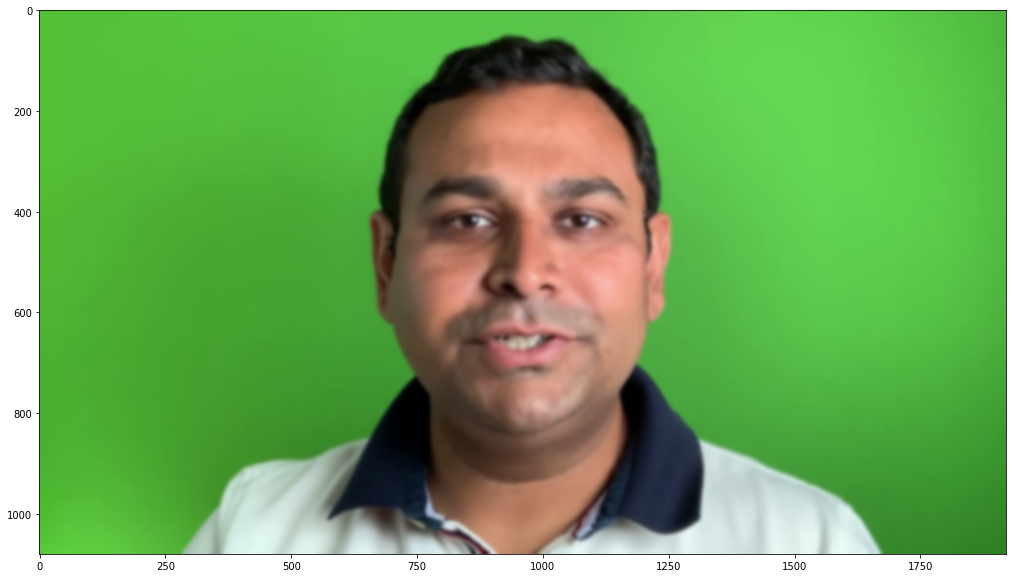

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))
image = cv2.imread('./data/sel2.jpeg', cv2.IMREAD_COLOR)
image = cv2.GaussianBlur(image, (21, 21), 0, 0)
plt.imshow(image[:,:,::-1])

-4.0
0.50442475
1.0
-1.8626451e-08
7


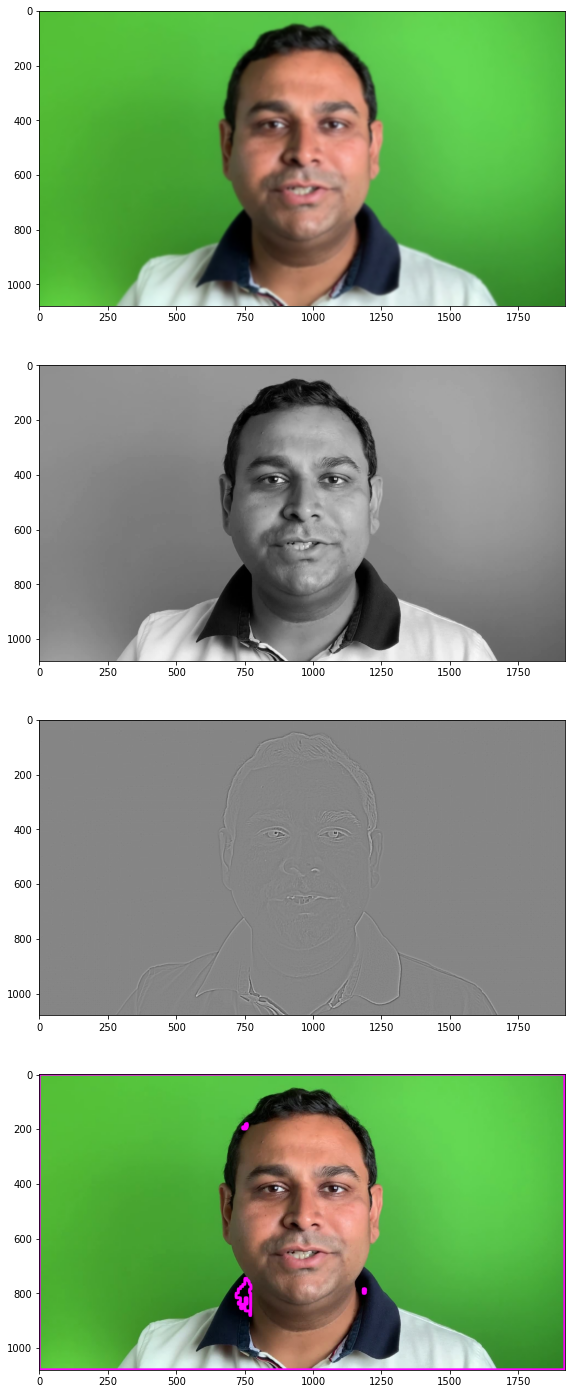

In [79]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(25, 25))
image = cv2.imread('./data/sel2.jpeg', cv2.IMREAD_COLOR)

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_blur = cv2.GaussianBlur(image, (21, 21), 0, 0)

image_blur_gray = cv2.GaussianBlur(image_gray, (9, 9), 0, 0)
image_laplacian = cv2.Laplacian(image_blur_gray, cv2.CV_32F, ksize = 3, scale = 1, delta = 0)
print(image_laplacian[500][900])
cv2.normalize(image_laplacian, dst = image_laplacian, alpha = 0, beta = 1, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)

print(image_laplacian[500][900])
print(np.max(image_laplacian))
print(np.min(image_laplacian))
# print(image_laplacian[500][900])


contours, hierarchy = cv2.findContours(image_blur_gray, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
image_lap_copy = image.copy()
cv2.drawContours(image_lap_copy, contours, -1, (255,0,255), 10)
print(len(contours))

plt.subplot(4, 1, 1)
plt.imshow(image_blur[:,:,::-1])

plt.subplot(4, 1, 2)
plt.imshow(image_gray, cmap='gray')

plt.subplot(4, 1, 3)
plt.imshow(image_laplacian, cmap='gray')

plt.subplot(4, 1, 4)
plt.imshow(image_lap_copy[:,:,::-1])

plt.show()

In [30]:
import cv2

i = 1

def blur(*args):
    
    global i
    
    i = args[0]
    
    if (i == 1) | (i % 2 != 0):
        r = cv2.GaussianBlur(image, (i, i), 0, 0)
    
    elif i % 2 == 0:
        i += 1
        r = cv2.GaussianBlur(image, (i, i), 0, 0)
    
    print(i)
    cv2.imshow('Picture', r)


image = cv2.imread('./data/sel2.jpeg', cv2.IMREAD_COLOR)

cv2.namedWindow('Picture', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Picture', (900, 600))


cv2.createTrackbar('Blur', 'Picture', 1, 35, blur)


cv2.imshow('Picture', image)
c = cv2.waitKey(0)
cv2.destroyAllWindows()

9
15
23
29
35


In [2]:
import cv2

In [26]:
cv2.cvtColor(image, cv2.COLOR_BGR2HSV)[100,100,:]

array([ 54, 237, 255], dtype=uint8)

In [54]:
a = np.array([])
# a = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)[100,100,:].reshape(-1, 3)
b = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)[100,100,:]# .reshape(-1, 3)
print(a)
print(b)
a = np.append(a, b).reshape(-1, 3)
print(a)
a = np.append(a, b).reshape(-1, 3)
print(a)

[]
[ 54 237 255]
[[ 54. 237. 255.]]
[[ 54. 237. 255.]
 [ 54. 237. 255.]]


In [50]:
a = [np.array([1, 2, 3]), ]

In [71]:
np.array([])

array([], dtype=float64)

In [62]:

a = np.array([[1, 2, 3]])
b = np.array([[4, 5, 6]])
c = np.append(a, b, 0)
c

array([[1, 2, 3],
       [4, 5, 6]])

In [65]:
np.min(c[:, 0])

1

In [73]:
np.array([]) is not None

True